## Importing libraries

In [1]:
from visualizations import show_results, get_experiment_results, get_column_names
import pandas as pd

## setting up expriment related variables

#### important variable names

In [17]:
columns = ["algo", "experiment_id", "dataset", "seed", "generation", "training_fitness", "timing", "pop_node_count"]
logger_name = "diogo_slim_times_one_logger_.csv"
log_level = 1

## Analysing the results

/Users/jimmy/Documents/Refresh/SLIMSHADY/SlimShady/utils/visualizations.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


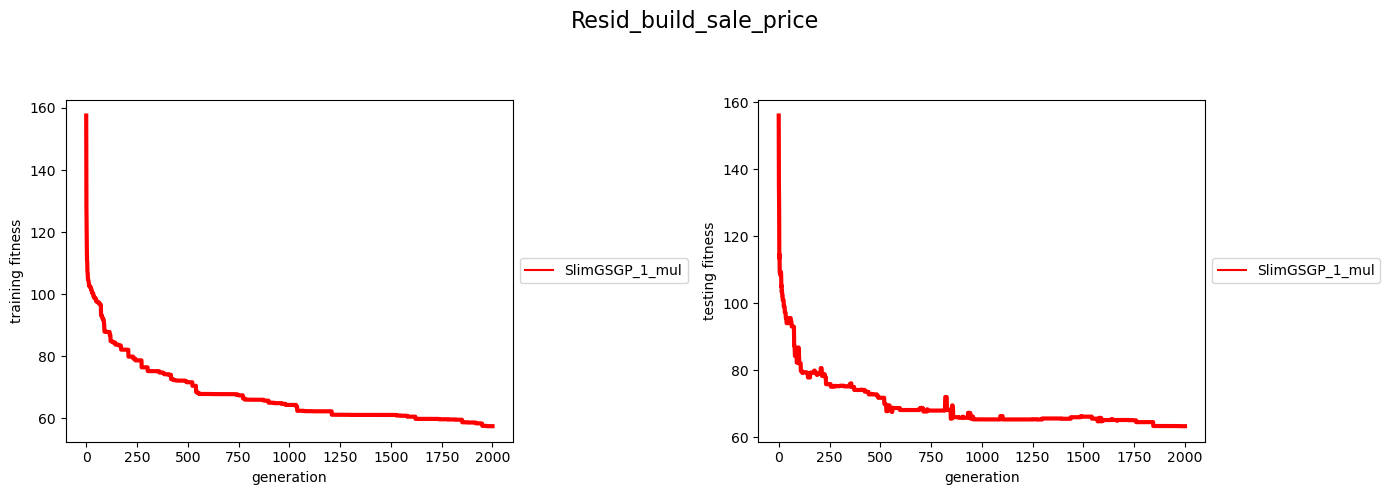

In [18]:
show_results(x_var = "generation", y_var="training_fitness", experiment_id=None, logger_name=logger_name,
             log_level=1, dataset="resid_build_sale_price")

### extra code for later

In [ ]:
# df["pop_fitnesses"].map(lambda x: torch.tensor([float(val.split("tensor(")[-1][:-1]) for val in x.split()]))

In [ ]:
df_mul = get_experiment_results(experiment_id=None, logger_name="liah_mul_logger.csv")
df_mul = df_mul[df_mul.dataset == "toxicity"]

df_s = get_experiment_results(experiment_id=None, logger_name="liah_sum_logger.csv")
df_s = df_s[df_s.dataset == "toxicity"]


fari = get_experiment_results(experiment_id=None, logger_name="diogo_slim_plus_one_logger_.csv")
fari = fari[fari.dataset == "toxicity"]

In [ ]:
farid = get_experiment_results(experiment_id=None, logger_name="davide_toxicity_+1.csv")
farid = farid[farid.dataset == "toxicity"]
farid = farid[~farid.seed.isin(fari.seed.unique())]
fari_final = pd.concat([fari, farid])
diogo = get_experiment_results(experiment_id=None, logger_name="diogo_slim_logger.csv")

In [ ]:
final = pd.concat([diogo, fari, df_mul, df_s])
final['log_level'] = final.seed.map(lambda x: 1)
final.to_csv("final.csv", header=False,  index=False)

In [7]:
a = "StandardGP,fa2d9f34-ea10-11ee-a0ac-18c04d6299ac,toxicity,0,0,2204.756591796875,0.17503881454467773,1554.0,1993.7264404296875,1"

In [10]:
a.split(',')

['StandardGP',
 'fa2d9f34-ea10-11ee-a0ac-18c04d6299ac',
 'toxicity',
 '0',
 '0',
 '2204.756591796875',
 '0.17503881454467773',
 '1554.0',
 '1993.7264404296875',
 '1']

In [16]:
fari

,algo,experiment_id,dataset,seed,generation,training_fitness,timing,pop_node_count,test_fitness,nodes_count
0,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,0,0,2204.756592,0.236009,1554.0,1993.726440,7
1,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,0,1,2204.747314,0.208035,2989.0,1993.716309,36
2,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,0,2,2204.747314,0.066448,1415.0,1993.716309,36
3,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,0,3,2204.747314,0.054498,2546.0,1993.716309,36
4,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,0,4,2204.747314,0.048011,1163.0,1993.716309,36
...,...,...,...,...,...,...,...,...,...,...
14002,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,6,1996,2419.985107,0.983222,559405.0,2356.051025,5719
14003,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,6,1997,2419.985107,0.962218,558540.0,2356.051025,5719
14004,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,6,1998,2419.980225,0.974219,559107.0,2356.046875,5732
14005,SlimGSGP_1_sum,5be597f6-ec31-11ee-b7b7-18c04d6299ac,toxicity,6,1999,2419.980225,0.990223,559497.0,2356.046875,5732


In [20]:
sum([0.0569, -0.2475,  0.0737, -0.3429])

-0.4598

In [21]:
import torch

In [22]:
a = torch.randn(4, 4)

In [23]:
b =  torch.randn(4, 4)

In [38]:
a = torch.tensor([10, 20, 30])
b = torch.tensor([1, 2, 3])

In [39]:
c= torch.stack([a, b])

In [33]:
torch.sum(c, dim=1)

tensor([60,  6])

In [40]:
torch.mul(0.5, torch.sub(a, b))

tensor([ 4.5000,  9.0000, 13.5000])